In this assignment, you will continue to study the data of the US Education System (dataset). You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

Does the performance in the exams vary according to gender, origin and education level of parents?

Does lunch type have a relationship with exam performances? How can you explain this, if any?

Does the preparation courses have an impact on exam performance?
Which lessons are most correlated with each other?


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df_1 = pd.read_csv('studPerform.csv')

In [33]:
df_1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [34]:
df_1.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [14]:
df_1.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Does the performance in the exams 

vary according to gender, origin and education level of parents?

In [108]:
df_2 = df_1.groupby("gender")

In [109]:
df_1.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Analysis : Looking over the numbers, everything seem very close together.  Now loets look at some graphs

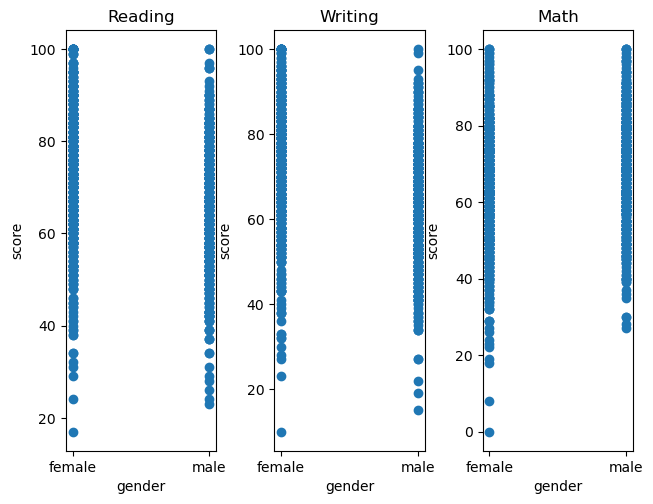

In [102]:
fig, ax = plt.subplots(1,3)
#plt.figure(figsize=(30,6))
fig.tight_layout()

ax[0].set_title("Reading")
ax[0].set_xlabel("gender")
ax[0].set_ylabel("score")
ax[0].scatter(df_1["gender"], df_1["reading score"])

ax[1].set_title("Writing")
ax[1].set_xlabel("gender")
ax[1].set_ylabel("score")
ax[1].scatter(df_1["gender"], df_1["writing score"])
              
ax[2].set_title("Math")
ax[2].set_xlabel("gender")
ax[2].set_ylabel("score")
ax[2].scatter(df_1["gender"], df_1["math score"])

plt.show()

In [114]:
df_2.describe().T

gender                   female        male
math score    count  518.000000  482.000000
              mean    63.633205   68.728216
              std     15.491453   14.356277
              min      0.000000   27.000000
              25%     54.000000   59.000000
              50%     65.000000   69.000000
              75%     74.000000   79.000000
              max    100.000000  100.000000
reading score count  518.000000  482.000000
              mean    72.608108   65.473029
              std     14.378245   13.931832
              min     17.000000   23.000000
              25%     63.250000   56.000000
              50%     73.000000   66.000000
              75%     83.000000   75.000000
              max    100.000000  100.000000
writing score count  518.000000  482.000000
              mean    72.467181   63.311203
              std     14.844842   14.113832
              min     10.000000   15.000000
              25%     64.000000   53.000000
              50%     74.000000   64.000000
              75%     82.000000   73.750000
              max    100.000000  100.000000

In [ ]:
### Analysis by looking at the mean first and then standard deviation
### All Standard deviations were close so it came down to the mean.
Reading -- Female has the advantage
Writing -- Female has the advantage
Math    -- Male has the advantage

### Education Level

associate's degree         AxesSubplot(0.1,0.679412;0.363636x0.220588)
bachelor's degree     AxesSubplot(0.536364,0.679412;0.363636x0.220588)
high school                AxesSubplot(0.1,0.414706;0.363636x0.220588)
master's degree       AxesSubplot(0.536364,0.414706;0.363636x0.220588)
some college                   AxesSubplot(0.1,0.15;0.363636x0.220588)
some high school          AxesSubplot(0.536364,0.15;0.363636x0.220588)
dtype: object

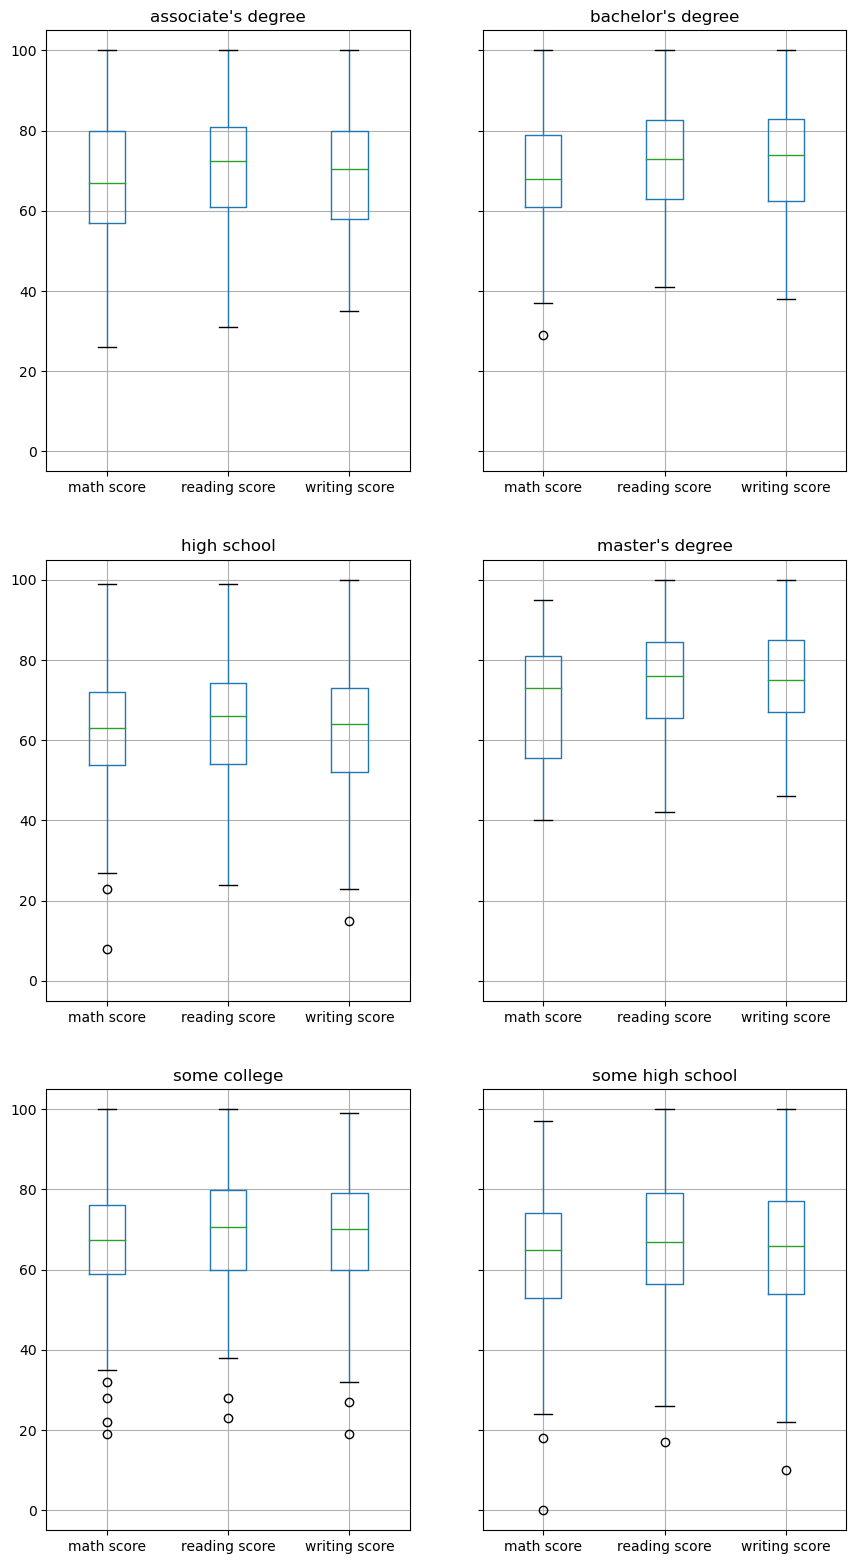

In [122]:
df_3 = df_1.groupby("parental level of education")
df_3.describe()
df_3.boxplot(figsize=(10,20))

In [124]:
df_3.describe().T

parental level of education  associate's degree  bachelor's degree  \
math score    count                  222.000000         118.000000   
              mean                    67.882883          69.389831   
              std                     15.112093          14.943789   
              min                     26.000000          29.000000   
              25%                     57.000000          61.000000   
              50%                     67.000000          68.000000   
              75%                     80.000000          79.000000   
              max                    100.000000         100.000000   
reading score count                  222.000000         118.000000   
              mean                    70.927928          73.000000   
              std                     13.868948          14.285250   
              min                     31.000000          41.000000   
              25%                     61.000000          63.000000   
              50%                     72.500000          73.000000   
              75%                     81.000000          82.750000   
              max                    100.000000         100.000000   
writing score count                  222.000000         118.000000   
              mean                    69.896396          73.381356   
              std                     14.311122          14.728262   
              min                     35.000000          38.000000   
              25%                     58.000000          62.500000   
              50%                     70.500000          74.000000   
              75%                     80.000000          83.000000   
              max                    100.000000         100.000000   

parental level of education  high school  master's degree  some college  \
math score    count           196.000000        59.000000    226.000000   
              mean             62.137755        69.745763     67.128319   
              std              14.539651        15.153915     14.312897   
              min               8.000000        40.000000     19.000000   
              25%              53.750000        55.500000     59.000000   
              50%              63.000000        73.000000     67.500000   
              75%              72.000000        81.000000     76.000000   
              max              99.000000        95.000000    100.000000   
reading score count           196.000000        59.000000    226.000000   
              mean             64.704082        75.372881     69.460177   
              std              14.132130        13.775163     14.057049   
              min              24.000000        42.000000     23.000000   
              25%              54.000000        65.500000     60.000000   
              50%              66.000000        76.000000     70.500000   
              75%              74.250000        84.500000     79.750000   
              max              99.000000       100.000000    100.000000   
writing score count           196.000000        59.000000    226.000000   
              mean             62.448980        75.677966     68.840708   
              std              14.085907        13.730711     15.012331   
              min              15.000000        46.000000     19.000000   
              25%              52.000000        67.000000     60.000000   
              50%              64.000000        75.000000     70.000000   
              75%              73.000000        85.000000     79.000000   
              max             100.000000       100.000000     99.000000   

parental level of education  some high school  
math score    count                179.000000  
              mean                  63.497207  
              std                   15.927989  
              min                    0.000000  
              25%                   53.000000  
              50%                   65.000000  
              75%                   7

There are 500 records and less then 3% so I will ignore the outliers.

The master had the best results across the board 

The bachelors was next, but the associates degree was close being and
did a little better in math.  Also some collage came close, but they did poorer in math.

Interesting some high school did better than high school.  

Though further study is needed.  What is signle factor is it access
to paid teachers or the parent help them with their homework mroe.

group A         AxesSubplot(0.1,0.679412;0.363636x0.220588)
group B    AxesSubplot(0.536364,0.679412;0.363636x0.220588)
group C         AxesSubplot(0.1,0.414706;0.363636x0.220588)
group D    AxesSubplot(0.536364,0.414706;0.363636x0.220588)
group E             AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

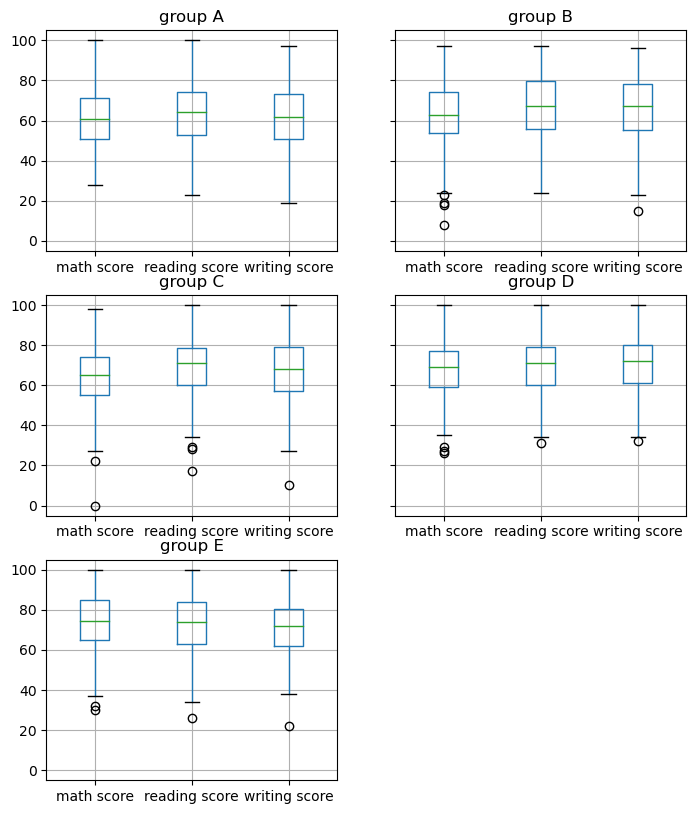

In [135]:
df_3 = df_1.groupby("race/ethnicity")
df_3.boxplot(figsize=(8,10))

In [ ]:
Group A was the lowest and D and C were second tier then group B 
and group was second and E was the best

Though further study is needed.  What culteral factor most affect this
relationship

In [137]:
## Does lunch type have a relationship with exam performances? 

How can you explain this, if any?


free/reduced         AxesSubplot(0.1,0.15;0.363636x0.75)
standard        AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

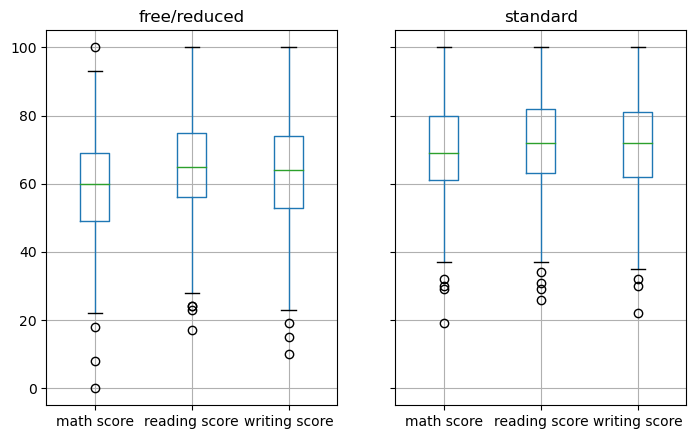

In [140]:
df_3 = df_1.groupby("lunch")
df_3.boxplot(figsize=(8,5))

In [ ]:
Definitely there is an effect.  My guess, though further is needed,
it might be cause of the social enconimic factors and not so much the 
free lunch.

In [ ]:
## Does the preparation courses have an impact on exam performance?

Which lessons are most correlated with each other?


In [ ]:
## Does lunch type have a relationship with exam performances? 

How can you explain this, if any?


completed         AxesSubplot(0.1,0.15;0.363636x0.75)
none         AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

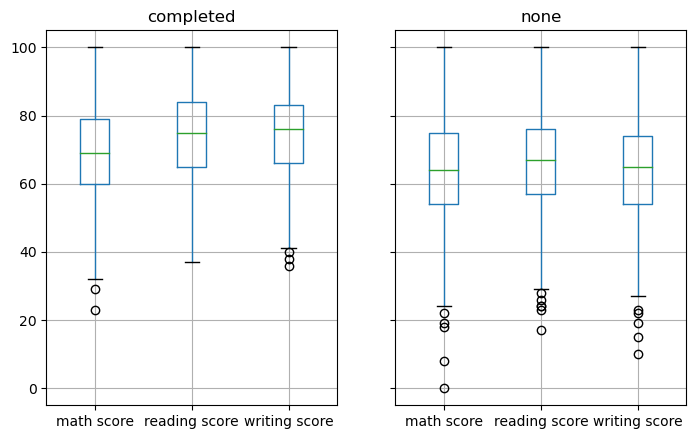

In [141]:
df_3 = df_1.groupby("test preparation course")
df_3.boxplot(figsize=(8,5))


In [159]:
# Kendall's will be used since measure how likely it is for two 
# variables to move in the same direction.
df_3.corr(method='kendall')

math score  reading score  \
test preparation course                                            
completed               math score       1.000000       0.597202   
                        reading score    0.597202       1.000000   
                        writing score    0.558748       0.807198   
none                    math score       1.000000       0.619326   
                        reading score    0.619326       1.000000   
                        writing score    0.604905       0.823375   

                                       writing score  
test preparation course                               
completed               math score          0.558748  
                        reading score       0.807198  
                        writing score       1.000000  
none                    math score          0.604905  
                        reading score       0.823375  
                        writing score       1.000000

In [ ]:
The lesson most correlated with each ( I have chosen 80% are higher)

No Preparation Courses : reading/writing
For Preparation Courses: reading/writing